In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv(
    '/home/zdw/python/machine_learning/data/ex2data1.txt', header=None)
feature=data[[0,1]]
label=data[2]
data.columns, feature.shape, label.shape

(Index([0, 1, 2], dtype='int64'), (100, 2), (100,))

In [2]:
from sklearn.model_selection import train_test_split
X = feature.values
Y = label.values.reshape(-1, 1)

X_test, X_train, Y_test, Y_train = train_test_split(X, Y, test_size=0.8)
# normalize data
X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std


print(f"{X_train.shape=}\n{Y_train.shape=}\n{X_test.shape=}\n{Y_test.shape=}")

X_train.shape=(80, 2)
Y_train.shape=(80, 1)
X_test.shape=(20, 2)
Y_test.shape=(20, 1)


In [243]:
class LogicRegression:
    def __init__(self, feature:np.ndarray) -> None:
        self.w = np.random.randn(feature.shape[1], 1)

    def forward(self, X):
        return self.sigmoid(X@self.w)

    def sigmoid(self, x):
        return 1.0/(np.exp(-x)+1)

    def loss(self, y_true, y_pred):
        return -np.mean(y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred))

    def gradient(self, X, y, y_pred):
        n_samples = y.shape[0]
        dw = (1.0/n_samples)*(X.T@(y_pred-y))
        return dw

    def update(self, X, y, y_pred,lr=0.02):
        dw=self.gradient(X,y,y_pred)
        self.w-=lr*dw


train_losses = []
predicts=[]
test_losses = []
my_regression=LogicRegression(X_train)
print(f"{my_regression.w.shape=}")
iters=1000
for _ in range(iters):
    y_pred=my_regression.forward(X_train)
    predicts.append(y_pred)
    train_los=my_regression.loss(Y_train,y_pred)
    train_losses.append(train_los)
    test_loss=my_regression.loss(Y_test,my_regression.forward(X_test))
    test_losses.append(test_loss)
    my_regression.update(X_train,Y_train,y_pred)
print(f'{max(train_losses)=}\n{min(train_losses)=}\n{max(test_losses)=}\n{min(test_losses)=}')

my_regression.w.shape=(2, 1)
max(train_losses)=2.118670217585258
min(train_losses)=0.30255875926622716
max(test_losses)=2.7495079251038397
min(test_losses)=0.3578441133041133


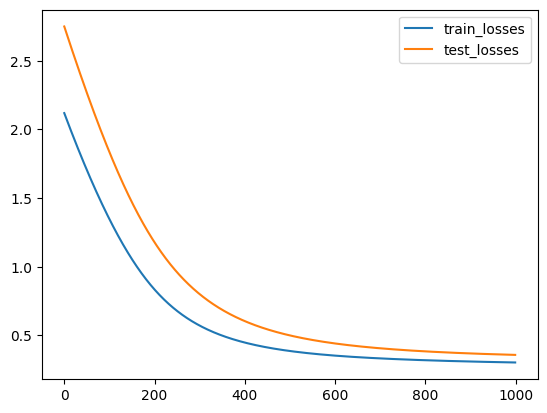

In [244]:
plt.plot(train_losses, label='train_losses')
plt.plot(test_losses, label='test_losses')
plt.legend()
plt.show()

acc=0.85
auc=0.875


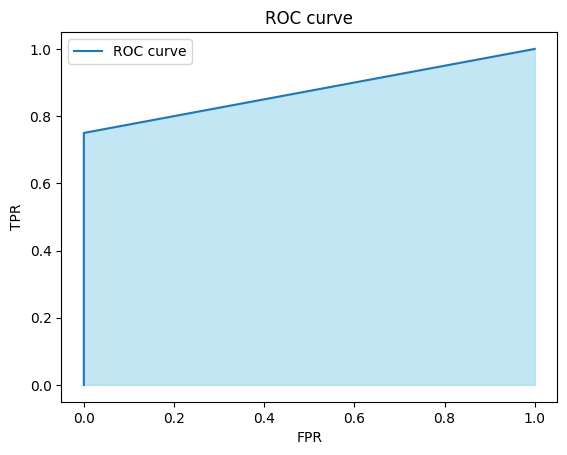

In [245]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
y_pred=my_regression.forward(X_test)
y_pred[y_pred>=0.5]=1
y_pred[y_pred<0.5]=0
acc=accuracy_score(Y_test,y_pred)
fpr,tpr,thresholds=roc_curve(Y_test,y_pred)
auc=roc_auc_score(Y_test,y_pred)
print(f'{acc=}\n{auc=}')
plt.plot(fpr,tpr,label='ROC curve')
plt.title("ROC curve")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.fill_between(x=fpr,y1=tpr,y2= 0, color='skyblue', alpha=0.5)
plt.show()